In [1]:
from Code import utilities as ut
from Code import cGAN as model
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [2]:
#user input:
latent_dim = 100  #latent_dimension used to train this model
n_gen = 3 #number of generations you want to see  
modelName = 'test'

In [3]:
#loading dataset, saved generative model, and respective loss
loaded_g_model = load_model('./models/cgan_' + modelName + '.h5')
loaded_loss = np.load('./models/cgan_loss_' + modelName + '.npy')
data = np.load('train_set_marm_100-30.npy')   

C:\Users\kanfar\AppData\Local\Continuum\anaconda3\envs\Deep\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
#Processing
focused, defocused = ut.dataProcess(data)     #process dataset
m = model.cGAN(focused.shape[1], focused.shape[2], focused.shape[3], latent_dim)
x_real, x_fake, input_cond = m.generate_fakes_givenMany(loaded_g_model, focused, defocused, latent_dim, n_examples = n_gen+2)

input_real shape:  (1800, 64, 64, 1)
input_cond shape:  (1800, 64, 64, 1)


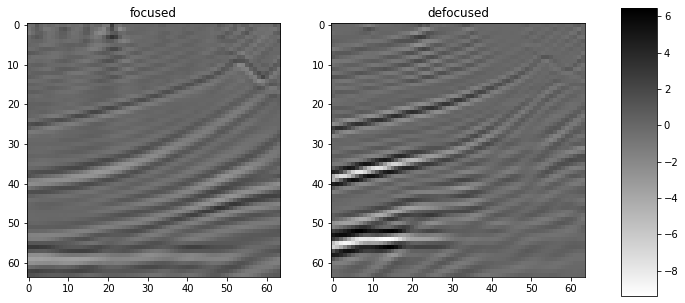

In [27]:
#Data inspection: plot processed dataset (focused and defocused)
ut.plotInput(focused,defocused)

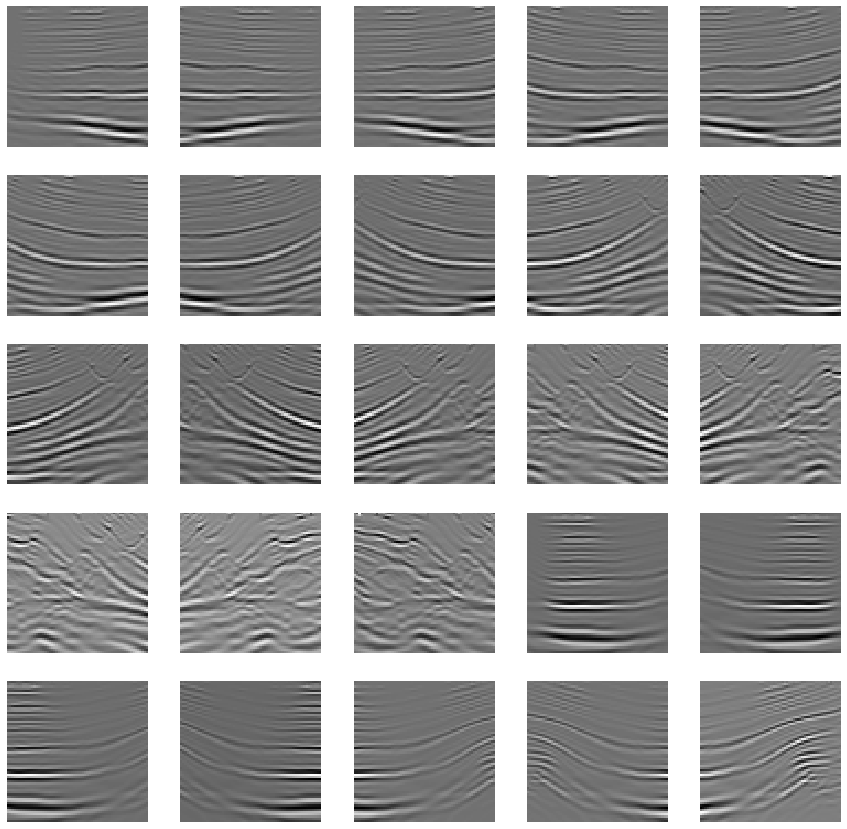

In [28]:
#Data inspection: plot processed dataset (focused and defocused)
ut.plotGen(defocused,5)

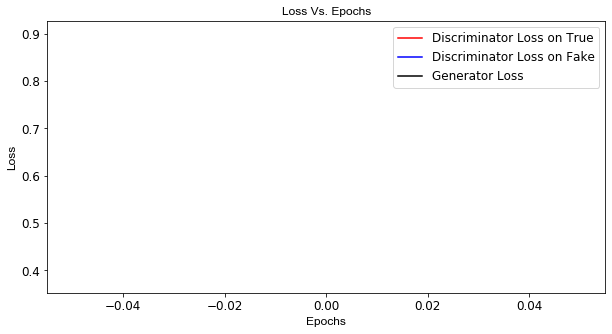

In [5]:
#Plot trained model loss
ut.plotLoss(loaded_loss,0)

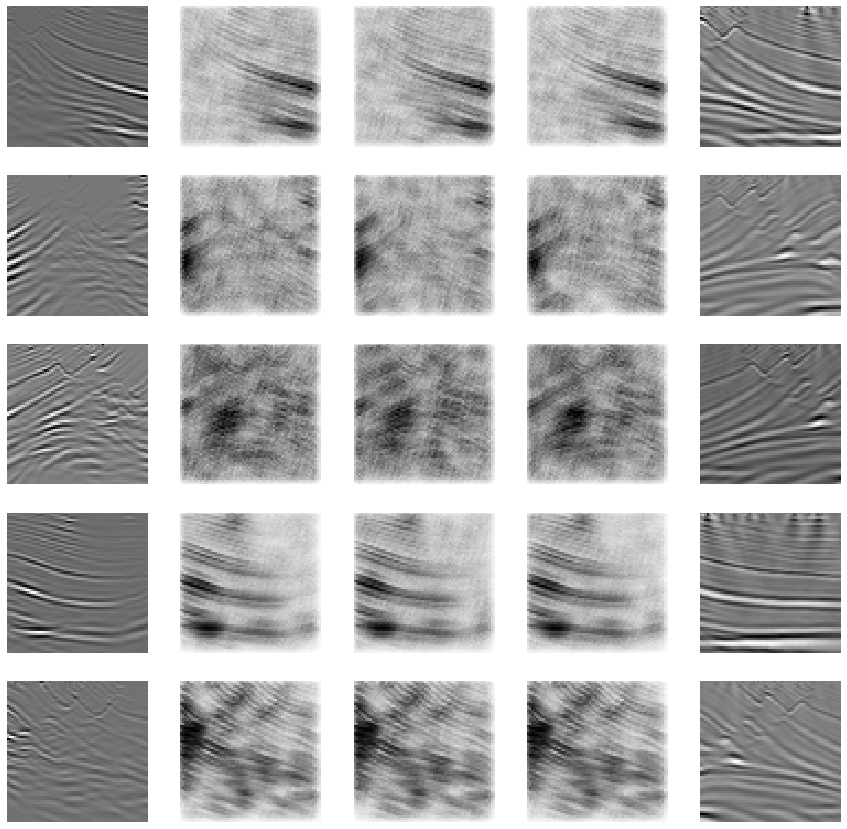

In [30]:
#Plot trained model loss
ut.plotCompare(x_real, x_fake, input_cond, n_gen)